In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# node display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',names=columns,header=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


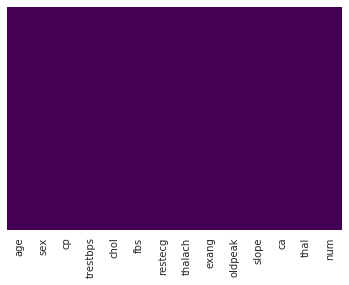

In [7]:
# check nulls visually

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
# found out that there are extra characters

In [10]:
# impute with nan first
df.replace('?',np.nan,inplace=True) 

In [11]:
df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


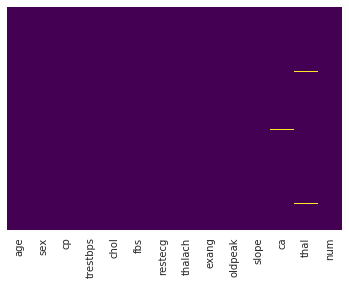

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap ='viridis')

In [13]:
# mode returns array so find the first index

df['ca'].fillna(df.ca.mode().values[0],inplace=True) 
df['thal'].fillna(df.thal.mode().values[0],inplace=True)

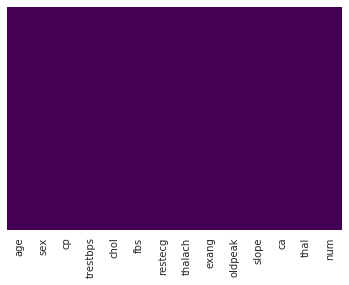

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap ='viridis')

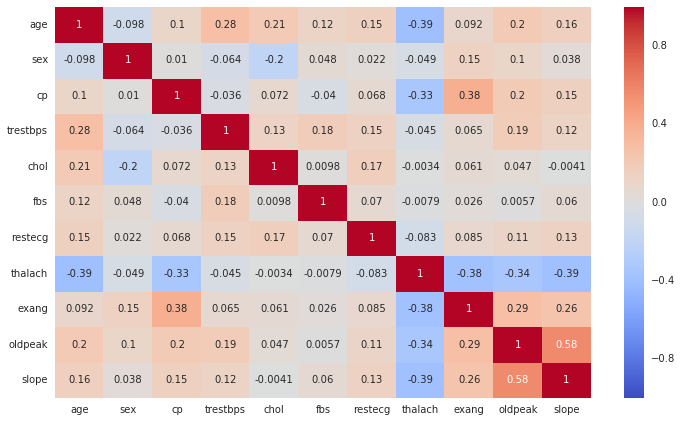

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.drop('num',axis=1).corr(),annot=True,cmap='coolwarm')

In [16]:
# classes = pd.get_dummies(trainDf['Pclass'],drop_first=True).rename(columns = lambda x:'Pclass_'+str(x))
ca = pd.get_dummies(df.ca,drop_first=True).rename(columns = lambda x: 'ca_'+str(x))

In [17]:
thal = pd.get_dummies(df.thal,drop_first=True).rename(columns = lambda x: 'thal_'+str(x))

In [18]:
df =df.drop(['ca','thal'],axis=1)

In [19]:
df = pd.concat([df,ca,thal],axis=1)

In [20]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,0.0,0.0,0.0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2,0.0,0.0,1.0,0.0,0.0


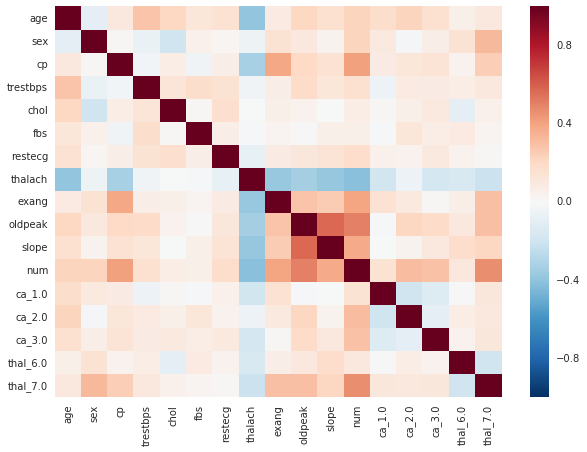

In [21]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr())

# Make Binary Classification 

In [22]:
df.num = df.num.apply(lambda x: 1 if x>0 else 0)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,0.0,0.0,0.0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1,0.0,0.0,1.0,0.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,0.0,1.0,0.0,0.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0.0,0.0,0.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0.0,0.0,0.0,0.0,0.0


# Machine Learning  Method 

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


/resources/common/.virtualenv/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/resources/common/.virtualenv/python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
X = df.drop('num',axis=1).values
y = df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 40)


# Svm with GridSearch


In [25]:

svm_clf = SVC(C=10.0,kernel ='rbf',gamma=0.1, decision_function_shape='ovr')
svm = pipeline.make_pipeline(StandardScaler(),svm_clf)

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid =[{
        'svc__C': param_range, 
        'svc__gamma': param_range, 
        'svc__kernel': ['sigmoid','poly','rbf']}]

gs_svm = GridSearchCV(estimator=svm,
                      param_grid = param_grid,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      verbose=0,
                      refit=True,
                      pre_dispatch='2*n_jobs')
    

In [26]:
 svm_scores = cross_val_score(gs_svm, X_train, y_train, scoring='accuracy', cv=10)


In [27]:
print('\nAverage Accuracy for  svm  is  %.2f +/- %.2f' % (np.mean(svm_scores), np.std(svm_scores)))



Average Accuracy for  svm  is  0.78 +/- 0.13


# Random Forest with GridSearch

In [28]:
rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)
rf_pipe = pipeline.make_pipeline(StandardScaler(),rf)

tree_range = range(10,300,10)
grid_prams = dict(n_estimators = tree_range)
rf_grid_search = GridSearchCV(rf,grid_prams,cv=5,scoring='accuracy',refit=True,n_jobs=-1)

In [29]:
rf_scores = cross_val_score(rf_grid_search, X_train, y_train, scoring='accuracy', cv=10)


In [30]:
print('\nAverage Accuracy for  rf  is  %.2f +/- %.2f' % (np.mean(rf_scores), np.std(rf_scores)))



Average Accuracy for  rf  is  0.79 +/- 0.08


## Stratified SVM  
Stratified K fold (Nested Cross Validation)


In [31]:
from sklearn.cross_validation import StratifiedKFold

svm_params = []
svm_scores = []
# Stratified K fold (Nested Cross Validation)
skfold = StratifiedKFold(y_train, 5, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    gs_svm.fit(X_train[train_idx], y_train[train_idx])
    y_pred = gs_svm.predict(X_train[test_idx])
    acc = accuracy_score(y_true=y_train[test_idx], y_pred=y_pred)
    svm_params.append(gs_svm.best_params_)
    svm_scores.append(acc)

In [32]:
print 'SVM FOLD SCORES'
for fold, score in enumerate(svm_scores):
    print '%d Folds Acuuracy Score %f' %(fold,score)

SVM FOLD SCORES
0 Folds Acuuracy Score 0.902439
1 Folds Acuuracy Score 0.707317
2 Folds Acuuracy Score 0.731707
3 Folds Acuuracy Score 0.850000
4 Folds Acuuracy Score 0.725000


In [33]:
print('SVM models:')
for idx, m in enumerate(zip(svm_params, svm_scores)):
    print('Fold %s. Accuracy: %.2f  with Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(svm_scores), np.std(svm_scores)))


SVM models:
Fold 1. Accuracy: 0.90  with Params: {'svc__gamma': 1.0, 'svc__kernel': 'sigmoid', 'svc__C': 0.1}
Fold 2. Accuracy: 0.71  with Params: {'svc__gamma': 0.1, 'svc__kernel': 'sigmoid', 'svc__C': 0.1}
Fold 3. Accuracy: 0.73  with Params: {'svc__gamma': 0.1, 'svc__kernel': 'sigmoid', 'svc__C': 0.1}
Fold 4. Accuracy: 0.85  with Params: {'svc__gamma': 0.01, 'svc__kernel': 'rbf', 'svc__C': 10.0}
Fold 5. Accuracy: 0.72  with Params: {'svc__gamma': 0.01, 'svc__kernel': 'rbf', 'svc__C': 1.0}

Average Accuracy 0.78 +/- 0.08


In [34]:
gs_svm.fit(X_train, y_train)
print('Best parameters %s' % gs_svm.best_params_)

Best parameters {'svc__gamma': 0.1, 'svc__kernel': 'rbf', 'svc__C': 1.0}


In [35]:
train_acc = accuracy_score(y_true=y_train, y_pred=gs_svm.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=gs_svm.predict(X_test))
print('Training accuracy: %.2f' % train_acc)
print('Test accuracy: %.2f' % test_acc)
print('Parameters: %s' % gs_svm.best_params_)

Training accuracy: 0.96
Test accuracy: 0.84
Parameters: {'svc__gamma': 0.1, 'svc__kernel': 'rbf', 'svc__C': 1.0}


## Stratified for Random Forest

In [36]:

rf_params = []
rf_scores = []
# skfold = StratifiedKFold(y_train, 5, shuffle=False, random_state=1)
for train_idx, test_idx in skfold:
    rf_grid_search.fit(X_train[train_idx], y_train[train_idx])
    y_pred = rf_grid_search.predict(X_train[test_idx])
    acc = accuracy_score(y_true=y_train[test_idx], y_pred=y_pred)
    rf_params.append(rf_grid_search.best_params_)
    rf_scores.append(acc)

In [37]:
print 'RF FOLD SCORES'
for fold,score in enumerate(rf_scores):
    print '%d Folds Acuuracy Score %f' %(fold,score) 

RF FOLD SCORES
0 Folds Acuuracy Score 0.878049
1 Folds Acuuracy Score 0.756098
2 Folds Acuuracy Score 0.756098
3 Folds Acuuracy Score 0.825000
4 Folds Acuuracy Score 0.700000


In [38]:
print('SVM models:')
for idx, m in enumerate(zip(rf_params, rf_scores)):
    print('%s. Acc: %.2f Params: %s' % (idx+1, m[1], m[0]))
print('\nAverage Accuracy %.2f +/- %.2f' % (np.mean(rf_scores), np.std(rf_scores)))


SVM models:
1. Acc: 0.88 Params: {'n_estimators': 60}
2. Acc: 0.76 Params: {'n_estimators': 30}
3. Acc: 0.76 Params: {'n_estimators': 70}
4. Acc: 0.82 Params: {'n_estimators': 150}
5. Acc: 0.70 Params: {'n_estimators': 30}

Average Accuracy 0.78 +/- 0.06


### Fit It 

In [39]:
rf_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [40]:
print ('Best Parameters for Random Forest : ',rf_grid_search.best_params_)

('Best Parameters for Random Forest : ', {'n_estimators': 190})


In [41]:
train_accuracy = accuracy_score(y_train,rf_grid_search.predict(X_train))
test_accuracy = accuracy_score(y_test,rf_grid_search.predict(X_test))

In [42]:
print 'Training Accuracy : ', train_accuracy
print 'Testing Accuracy : ', test_accuracy
print 'Best Parametere : ', rf_grid_search.best_params_

Training Accuracy :  1.0
Testing Accuracy :  0.83
Best Parametere :  {'n_estimators': 190}


### Fit it with best params


In [43]:
clf = rf_grid_search.best_estimator_

In [44]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=190, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [45]:
rf_grid_test_score = clf.score(X_test,y_test)

In [46]:
print('Test Score : ',rf_grid_test_score )

('Test Score : ', 0.82999999999999996)


In [47]:
# 

# Bagged Classifier without paramer optimization and evaluation

In [48]:
class BaggedSvmClassifier:
    def __init__(self,B):
        self.B = B
    
    def fit(self,X,Y):
        N = len(X)
        self.models =[]
        for b in xrange(self.B):
#             draw samples with replacement
            idx = np.random.choice(N,size=N, replace=True)
            Xb= X[idx]
            Yb = Y[idx]
            
#             model creation
            
            model = svm_clf
            model.fit(Xb,Yb)
            
            self.models.append(model)
            
    def predict(self,X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return np.round(predictions/self.B)
    
    def score(self,X,Y):
        predicts = self.predict(X)
        return np.mean(Y == predicts)
    
model = BaggedSvmClassifier(200)
model.fit(X,y)
print 'Bagged Svm Score :',model.score(X,y)


Bagged Svm Score : 0.83498349835


In [49]:
class BaggedRfClassifier:
    def __init__(self,B):
        self.B = B
    
    def fit(self,X,Y):
        N = len(X)
        self.models =[]
        for b in xrange(self.B):
#             draw samples with replacement
            idx = np.random.choice(N,size=N, replace=True)
            Xb= X[idx]
            Yb = Y[idx]
            
#             model creation
            
            model = rf
            model.fit(Xb,Yb)
            
            self.models.append(model)
            
    def predict(self,X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return np.round(predictions/self.B)
    
    def score(self,X,Y):
        predicts = self.predict(X)
        return np.mean(Y == predicts)
    
model = BaggedSvmClassifier(200)
model.fit(X,y)
print 'Bagged Random Forest Score :',model.score(X,y)

Bagged Random Forest Score : 0.838283828383
